## DAĞILIM GRAFİKLERİ

## Barplot (Sütun Grafikler)
* Kategorik değişkenleri görselleştirmek için kullanılır.

In [20]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Veri Setine Hızlı Bakış

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


* Yaklaşık 54000 gözlem birimi olan
* 3 kategorik ve 7 sayısal olmak üzere toplam 10 adet değişkene sahip
* Ram de tuttuğu alan 3 MB olan bir veri seti
* Gözlem sayısını değişken sayısını tipleri hakkında bilgi edinmiş olduk info()

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


* Elimizdeki sürekli değişkenlerin yapısını hızlıca anlamaya çalışıyoruz

In [31]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [33]:
kat_df= df

In [42]:
kat_df["cut"].value_counts() # kategorik değişkenin içindeki sınıflar ve bu sınıfların gözlenme frekanslarına yani gözlenme sıklıklarına eriştik

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [44]:
kat_df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [46]:
# ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [48]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [52]:
df.cut=df.cut.astype(CategoricalDtype (ordered = True))

In [54]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [56]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

* !Kategorik değişkenlerde ölçek ordinal(sıralamalı) ise ki şuan işlem yaptığımız değişken ölçeği ordinal çünkü kötüden en iyiye doğru bir sıralama söz konusu bu sıralamayı python programlama diline ifade etmeliyiz aksi takdirde farklı birsıralama ile karşı karşıya kalırız netice de öyle oldu.

In [58]:
cut_kategoriler=["Fair","Good","Very Good", "Premium", "Ideal"] # olması gereken sıralama 

In [60]:
df.cut = df.cut.astype(CategoricalDtype(categories= cut_kategoriler,ordered = True)) #python a nasıl sıralaması gerektiği bildirildi

In [62]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

### barplot

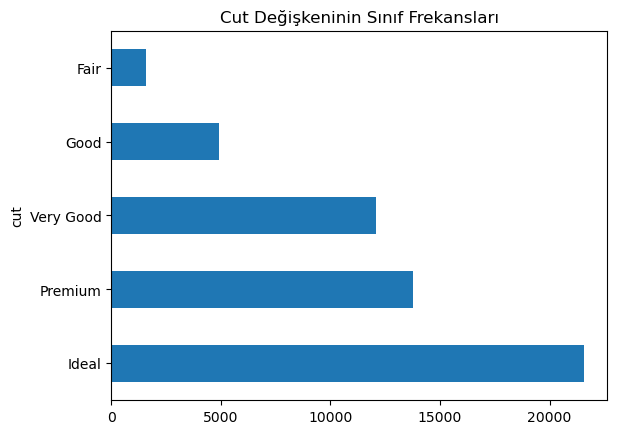

In [74]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

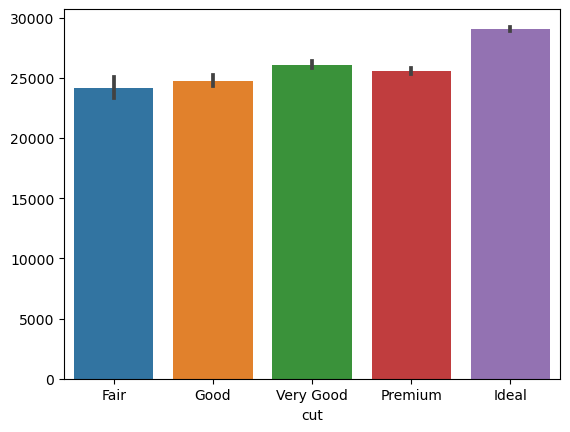

In [76]:
sns.barplot(x = "cut",y = df.cut.index,data = df);